In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [7]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25)

In [8]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the in
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.905645784996133


In [9]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the in
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.905645784996133


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=4)

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
print(knn.predict(X_test))

[0 1 1 ... 0 0 0]


In [14]:
print(knn.score(X_test, y_test))

0.8492753623188406


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
# Make sure the dataset is available in the correct path
emails_df = pd.read_csv('emails.csv')

In [16]:
 # Split the data into features and target
X = emails_df.drop(columns=['Email No.', 'Prediction']) # Drop unnecessary columns
y = emails_df['Prediction']

In [17]:
 # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [18]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
 # K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Predicting with KNN
y_pred_knn = knn.predict(X_test)

In [21]:
 # Support Vector Machine (SVM) model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Predicting with SVM
y_pred_svm = svm.predict(X_test)

In [23]:
# Evaluate performance of both models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Performance of {model_name}:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Performance of K-Nearest Neighbors:

Accuracy: 0.8253865979381443
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1097
           1       0.63      0.96      0.76       455

    accuracy                           0.83      1552
   macro avg       0.81      0.86      0.81      1552
weighted avg       0.88      0.83      0.83      1552

Confusion Matrix:
 [[846 251]
 [ 20 435]]


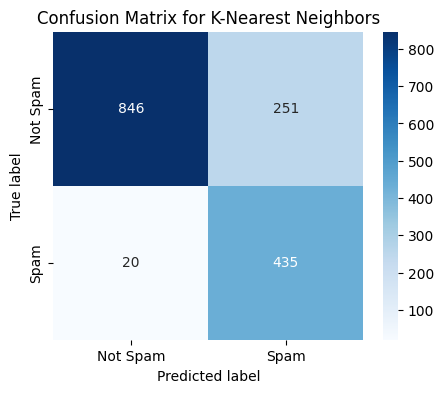

In [24]:
 # Evaluate KNN model
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

Performance of Support Vector Machine:

Accuracy: 0.9400773195876289
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1097
           1       0.89      0.91      0.90       455

    accuracy                           0.94      1552
   macro avg       0.92      0.93      0.93      1552
weighted avg       0.94      0.94      0.94      1552

Confusion Matrix:
 [[1043   54]
 [  39  416]]


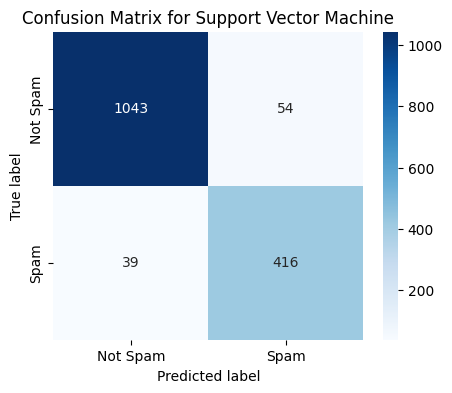

In [25]:
 # Evaluate SVM model
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

In [27]:
 # Compare accuracy scores
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))

K-Nearest Neighbors Accuracy: 0.8253865979381443
Support Vector Machine Accuracy: 0.9400773195876289
